# Aula 2 - Fundamentos da aprendizagem supervisionada

____________

Conforme vimos anteriormente, dividimos ML em 3 grandes abordagens:

<img src="https://i.pinimg.com/originals/67/70/5d/67705d8c7aee0c6b601c16548076e924.png" width=600>

Neste curso, trataremos sobre a aprendizagem supervisionada e não supervisionada.

Inicialmente, vamos introduzir e explorar a fundo a **aprendizagem supervisionada**. 

Após seus conceitos e técnicas estarem bem fundamentados, veremos que a aprendizagem não-supervisionada será bem facilmente compreendida, o que faremos nos módulos seguintes.

Vamos apresentar a aprendizagem supervisionada segundo a seguinte figura:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/dfc2968c-b9a9-43a9-a531-e24e34c2e270.png>

Podemos resumir a informação acima no seguinte diagrama:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/70da0385-e3fc-4fda-ba15-0004cc3b68ae.PNG>

Esquematicamente, vamos dividir cada "passada no ciclo" de modelagem em dois grandes passos:

## Passo 1: construção do modelo

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/23769bcb-a364-4d7b-a68f-04b3dfcde684.png>

## Passo 2: avaliação do modelo

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/8de84cf0-adb1-4203-921c-bc8dec07df55.png>

Agora que temos estas noções claras, vamos concretizar, nas próximas aulas, as etapas do ciclo de modelagem (passos de 1) a 7)):

- 0) Conhecer os dados com os quais estamos trabalhando --- fazer todo o processo de EDA, etc., etc.


- 1) Importar a **classe do estimador que se deseja treinar** - escolher a hipótese!
    - Usaremos a biblioteca [scikit-learn](https://scikit-learn.org/stable/)
  
  
- 2) Instanciar a classe do estimador, **escolhendo os hiperparâmetros desejados**
    - Para a primeira versão do modelo, pode ser uma boa escolha utilizar os parâmetros default;
    - Veremos mais pra frente como escolher os hiperparâmetros adequadamente;
   
   
- 3) Separe os dados em **dados de treino** e **dados de teste**.
    - Em alguns casos, pode ser interessante criar também um conjunto de **dados de validação**
    - Para fazer a separação, usamos o [train-test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    
    
- 4) Treine o modelo, usando **os dados de treino**


- 5) Use o modelo treinado para **fazer previsões** usando os **dados de teste** (ou **de validação**)


- 6) **Avalie a performance do modelo com base nas previsões acima**


- 7) Se necessário, reinicie o ciclo!


- 8) Quando o modelo estiver suficientemente bom, faça o **deploy**

### Um exemplo de medida erro...

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('dados_modelos/altura_peso.csv')
df.head()

,altura,peso
0,154,45
1,156,50
2,165,60
3,160,55
4,165,58


In [4]:
df.shape

(8, 2)

In [5]:
df.dtypes

altura    int64
peso      int64
dtype: object

In [6]:
import seaborn as sns

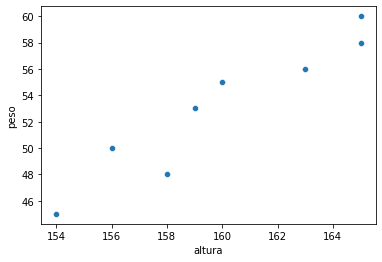

In [7]:
_ = sns.scatterplot(x='altura', y='peso', data=df)

Predizendo pesos...

In [8]:
alturas = [155, 161, 165]
alturas

[155, 161, 165]

In [9]:
np.array(alturas)

array([155, 161, 165])

In [10]:
alturas_array = np.array(alturas).reshape(-1, 1)
alturas_array

array([[155],
       [161],
       [165]])

In [11]:
import pickle

In [12]:
with open('dados_modelos/estimador_reg_lin.pickle', 'rb') as f:
    estimador = pickle.load(f)

In [13]:
pesos_estimados = estimador.predict(alturas_array)
pesos_estimados

array([47.13362069, 54.32327586, 59.11637931])

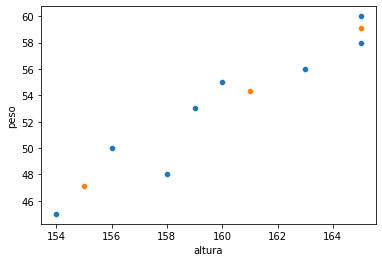

In [14]:
_ = sns.scatterplot(x='altura', y='peso', data=df)
_ = sns.scatterplot(x=alturas, y=pesos_estimados)

In [15]:
estimador.coef_

array([1.19827586])

In [16]:
estimador.intercept_

-138.59913793103445

In [17]:
# a * x + b
155 * 1.19827586 + (-138.59913793103445)

47.13362036896555

Qual foi o erro?
<img src=" 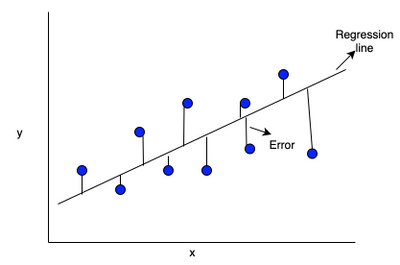" >

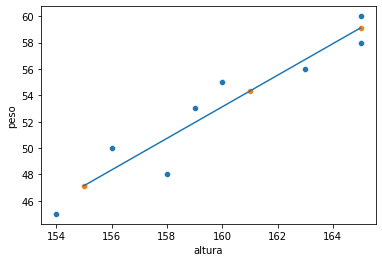

In [18]:
_ = sns.scatterplot(x='altura', y='peso', data=df)
_ = sns.scatterplot(x=alturas, y=pesos_estimados)
_ = sns.lineplot(x=alturas, y=pesos_estimados)

In [19]:
altura_real = 160
peso_real = 55

In [20]:
# Previsao
160 * 1.19827586 + (-138.59913793103445)

53.12499966896556

In [21]:
# Previsao
peso_predito = estimador.predict([[160]])
peso_predito

array([53.125])

In [22]:
erro_uma_previsao = peso_real - peso_predito
erro_uma_previsao

array([1.875])

Validação

In [23]:
# Exemplo filtro
df_temp = df.head().copy()
df_temp

,altura,peso
0,154,45
1,156,50
2,165,60
3,160,55
4,165,58


In [24]:
df_temp['altura'] == 154

0     True
1    False
2    False
3    False
4    False
Name: altura, dtype: bool

In [25]:
df_temp[df_temp['altura'] == 154]

,altura,peso
0,154,45


In [26]:
# Randomizando True e False
np.random.rand(len(df))

array([0.70143651, 0.76031095, 0.88028546, 0.30091493, 0.11293266,
       0.50640262, 0.17870017, 0.91867881])

In [27]:
np.random.rand(len(df)) < 0.1 # 10% serao True

array([False, False, False, False, False, False,  True, False])

In [ ]:
# Criando um modelo
# 1) Dividindo os dados em treino e teste

In [28]:
filtro = np.random.rand(len(df)) < 0.7
filtro

array([ True,  True,  True,  True, False, False, False,  True])

In [29]:
df_treino = df[filtro]
df_treino

,altura,peso
0,154,45
1,156,50
2,165,60
3,160,55
7,159,53


In [30]:
df_teste = df[~filtro]
df_teste

,altura,peso
4,165,58
5,163,56
6,158,48


In [ ]:
# 2) Treinando modelo, tenho que fornecer o X e o y
# X são as features
# y é o target

In [31]:
X_treino = df_treino.drop(['peso'], axis=1)
X_treino

,altura
0,154
1,156
2,165
3,160
7,159


In [32]:
y_treino = df_treino['peso']
y_treino

0    45
1    50
2    60
3    55
7    53
Name: peso, dtype: int64

In [33]:
X_teste = df_teste.drop(['peso'], axis=1)
X_teste

,altura
4,165
5,163
6,158


In [34]:
y_teste = df_teste['peso']
y_teste

4    58
5    56
6    48
Name: peso, dtype: int64

In [35]:
# Aqui a gente faria o treino, também chamado de fit
# E assim nasce o estimador (modelo)
with open('dados_modelos/estimador_reg_lin.pickle', 'rb') as f:
    estimador = pickle.load(f)

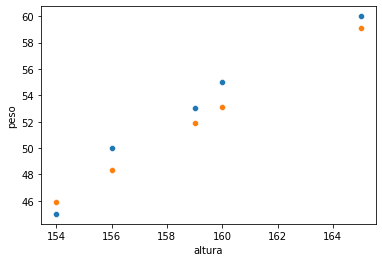

In [36]:
# Dentro do treino ele faz a "validação"
# Metrica de erro no treino
# TODO faltaria separar os dados de Treino e Validação para o momento do treino

y_predito_treino = estimador.predict(X_treino)
y_predito_treino
_ = sns.scatterplot(x='altura', y='peso', data=df_treino)
_ = sns.scatterplot(x=X_treino['altura'], y=y_predito_treino)

In [37]:
# Media absoluta de erro = (erro primeiro ponto + erro segundo ponto) / 2
(abs(-2) + abs(5)) / 2

3.5

Tipos de Erros, parte 1

<img src=" 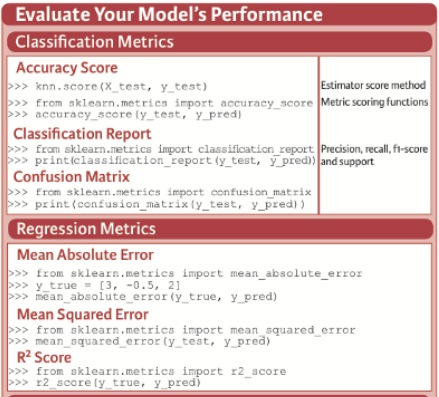" >

In [38]:
erro = 0
soma_erro_absoluto = 0
qtde_pontos = len(y_predito_treino)

for i in range(qtde_pontos):
    print(f'Valor esperado {y_treino.values[i]}')
    print(f'Valor predito {y_predito_treino[i]}')
    
    erro = y_treino.values[i] - y_predito_treino[i]
    erro_absoluto = abs(erro)
    soma_erro_absoluto += erro_absoluto
    
    print(f'Erro {erro}')
    print(f'Erro absoluto {erro_absoluto}')
    print()

media_erro_absoluto = soma_erro_absoluto / qtde_pontos

print(f'MAE {media_erro_absoluto}')

Valor esperado 45
Valor predito 45.93534482758622
Erro -0.9353448275862206
Erro absoluto 0.9353448275862206

Valor esperado 50
Valor predito 48.33189655172413
Erro 1.6681034482758719
Erro absoluto 1.6681034482758719

Valor esperado 60
Valor predito 59.116379310344826
Erro 0.8836206896551744
Erro absoluto 0.8836206896551744

Valor esperado 55
Valor predito 53.125
Erro 1.875
Erro absoluto 1.875

Valor esperado 53
Valor predito 51.926724137931046
Erro 1.0732758620689538
Erro absoluto 1.0732758620689538

MAE 1.287068965517244


In [39]:
from sklearn.metrics import mean_absolute_error

In [40]:
mean_absolute_error(y_treino.values, y_predito_treino)

1.287068965517244

Teste